In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u

from astropy.constants import G, R_sun, M_sun, R_earth, M_earth, R_jup, M_jup, L_sun, \
m_e, m_p, c, k_B, h, e, sigma_sb

In [3]:
# data dictionary 
# name: [log(EIRP), log(transmitter rate), [frequency range], sky coverage, minimum detectable flux, \
# marker shape, Drake figure of merit]

data = {}

data['Price 2020 (GBT L)'] = [12.32, -2.67, [1100, 1900], None, 6.82, '^', 993]
data['Price 2020 (GBT S)'] = [12.32, -2.64, [1800, 2800], None, 6.82, 's', 1240]
data['Price 2020 (GBT L & S)'] = [None, None, None, 22.1, 6.82, '^', None]
data['Price 2020 (Parkes)'] = [12.96, -1.73, None, 22.1, 23.18, 'p', 170]
data['Price 2020 (GBT & Parkes)'] = [None, None, [1100, 3450], 22.1, None, '^', None]

data['Enriquez 2017 (GBT L)'] = [12.72, -2.48, [1100, 1900], 10.6, 17.68, '^', 94.1]

data['Gray 2017 (JVLA 1.4GHz)'] = [21.30, -8.85, [1399, 1401], 22.7, 28.41, '^', 0.150]
data['Gray 2017 (JVLA 8.4GHz)'] = [21.15, -7.17, [8400, 8400], 22.7, 20.12, 's', 0.0314]

data['Harp 2016 (ATA) 1'] = [16.94, -2.02, None, None, None, '^', 358]
data['Harp 2016 (ATA) 2'] = [16.74, -2.90, None, None, None, 's', 91.4]
data['Harp 2016 (ATA) 3'] = [14.58, -2.28, None, None, None, 'p', 15.1]
data['Harp 2016 (ATA) 4'] = [15.04, -2.60, None, None, None, 'h', 12.0]
data['Harp 2016 (ATA)'] = [None, None, [1000, 9000], 193, 265, '^', None]

data['Siemion 2013 (GBT L)'] = [15.15, -1.58, [1100, 1900], 1.3, 10.21, '^', 26.7]

data['Project Phoenix (Parkes L)'] = [14.74, -1.88, None, None, 100, '^', 9.9]
data['Project Phoenix (Parkes S)'] = [14.74, -1.74, None, None, 100, 's', 22.5]
data['Project Phoenix (Parkes & NRAO)'] = [None, None, None, 18, 100, '^', None]
data['Project Phoenix (Arecibo L)'] = [13.94, -1.85, None, None, 16, 'p', 104]
data['Project Phoenix (Arecibo S)'] = [13.94, -2.29, None, None, 16, 'h', 352]
data['Project Phoenix (Arecibo)'] = [None, None, None, 18, 16, 's', None]
data['Project Phoenix (NRAO 43m)'] = [14.74, -2.22, None, None, 100, 'o', 32.4]
data['Project Phoenix'] = [None, None, [1200, 3000], 18, None, '^', None]

data['Horowitz 1993 (Harvard-Smithsonian)'] = [18.04, -3.93, [1419.8, 1420.2], 28052, 938, '^', 1.17]

data['Valdes 1986 (HCRO) 1'] = [13.26, 1.36, None, 14.7, 2815, '^', 1.23e-4]
data['Valdes 1986 (HCRO) 2'] = [12.34, 3.21, None, 14.7, 351, 's', 1.74e-4]
data['Valdes 1986 (HCRO)'] = [None, None, [1516, 1517.4], 14.7, None, '^', None]

data['Tarter 1980 (NRAO 91m)'] = [13.04, 0.77, [1665.7, 1667.1], 3, 151, '^', 2.26e-3]

data['Verschuur 1973 (NRAO 91m)'] = [11.75, 2.90, None, 1.6, 188, '^', 3.73e-4]
data['Verschuur 1973 (NRAO 43m)'] = [12.58, 0.95, None, 1.6, 1289, 's', 6.92e-4]
data['Verschuur 1973 (NRAO)'] = [None, None, [1416, 1436], 1.6, None, '^', None]

data['JVLA (coherent)'] = [15.62, -7.90, None, 12500, 35, '^', 121]
data['JVLA (incoherent)'] = [16.16, -8.70, None, None, 179, 's', None]

data['MeerKAT'] = [14.62, -5.88, [544, 1712], 15240, 3.51, '^', 1.78e6]

data['LOFAR'] = [16.81, -5.90, None, None, 5774, '^', None]

data['MWA'] = [20.00, -7.00, None, None, None, '^', None]

data['SKA1 (low)'] = [14.16, -6.36, None, None, 0.808, '^', None]
data['SKA1 (mid)'] = [13.95, -5.66, None, None, 0.491, 's', None]

data['ngVLA'] = [13.89, -5.98, None, None, 0.433, '^', None]

In [4]:
# JVLA: [[frequency ranges], sky coverage, minimum detectable flux]
JVLA_data = [ [[58, 84], [230, 472], [1000, 50000]] , 12500, 35]

In [5]:
def get_clr(s: str) -> str:
    """Return a colour associated with the string s.
    
    """
    
    # Define a clr before the if statement, so that, if no condition is met, 
    # then the function should not return an error
    clr = 'beige'
    
    if 'Price' in s:
        clr = 'limegreen'
    elif 'Enriquez' in s:
        clr = 'darkgreen'
    elif 'Gray' in s:
        clr = 'royalblue'
    elif 'Harp' in s:
        clr = 'purple'
    elif 'Siemion' in s:
        clr = 'red'
    elif 'Phoenix' in s:
        clr = 'orange'
    elif 'Horowitz' in s:
        clr = 'cyan'
    elif 'Valdes' in s:
        clr = 'pink'
    elif 'Tarter' in s:
        clr = 'lightblue'
    elif 'Verschuur' in s:
        clr = 'gold'
    elif 'ngVLA' in s:
        clr = 'olive' 
    elif 'JVLA' in s:
        clr = 'teal'
    elif 'MeerKAT' in s:
        clr = 'fuchsia'
    elif 'LOFAR' in s:
        clr = 'brown'
    elif 'MWA' in s:
        clr = 'yellow'
    elif 'SKA1' in s:
        clr = 'black'

    return clr

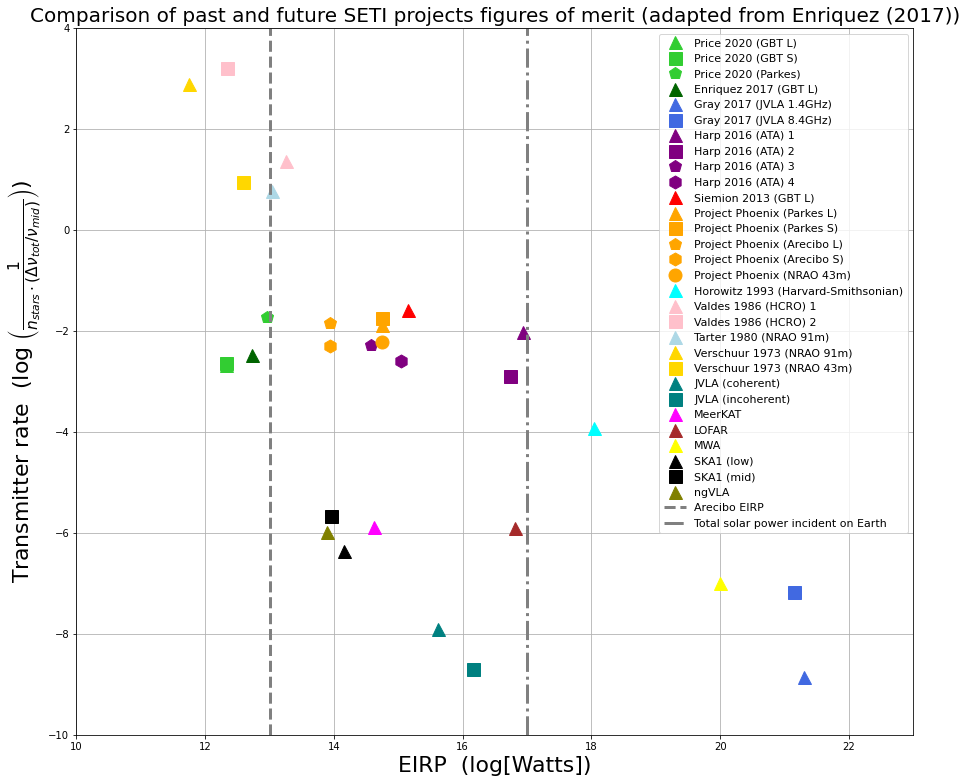

In [6]:
for key in data:

    # exclusions
    if data[key][0] != None and data[key][1] != None:
        
        plt.plot(data[key][0], data[key][1], 
                 data[key][5], color=get_clr(key), ms=13, label=key)

plt.axvline(x=13, color='gray', ls='--', lw=3, label='Arecibo EIRP')
plt.axvline(x=17, color='gray', ls='-.', lw=3, label='Total solar power incident on Earth')

plt.xlim(10, 23)
plt.ylim(-10, 4)
    
plt.xlabel('EIRP  (log[Watts])', fontsize=22)
plt.ylabel(r'Transmitter rate  (log $\left(\frac{1}{n_{stars} \cdot (\Delta \nu_{tot} / \nu_{mid})}\right)$)', 
           fontsize=22)
plt.title('Comparison of past and future SETI projects figures of merit (adapted from Enriquez (2017))', fontsize=20)

plt.gcf().set_size_inches(15, 13)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
#plt.savefig('Figure1.pdf')
plt.show()

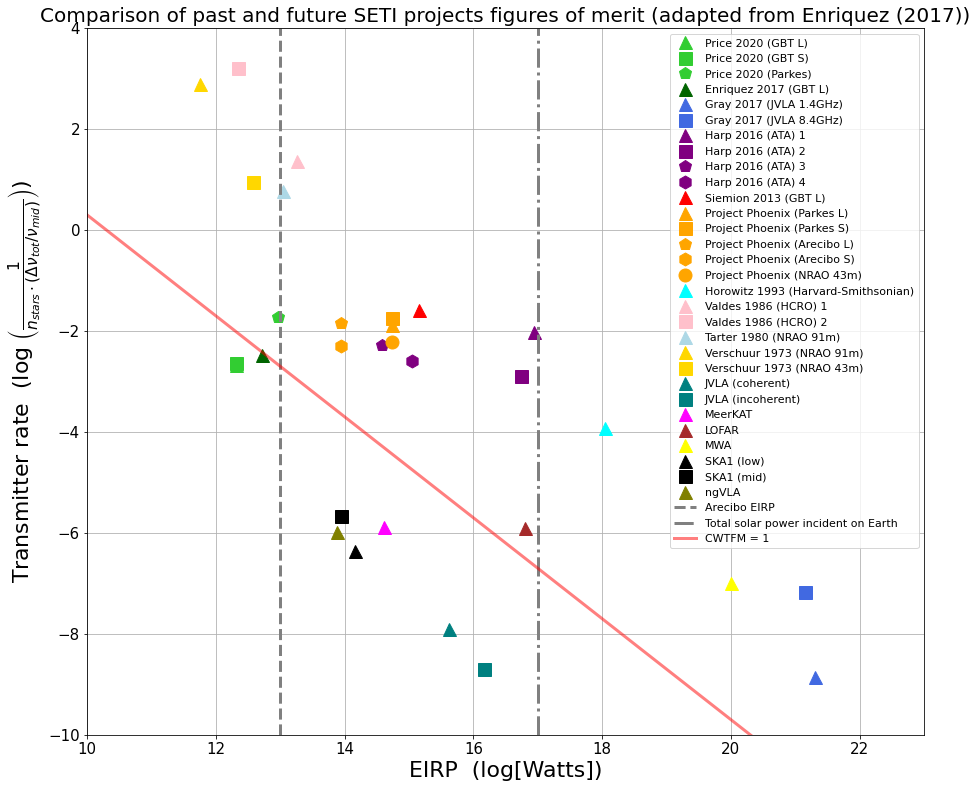

In [7]:
for key in data:

    # exclusions
    if data[key][0] != None and data[key][1] != None:
        
        plt.plot(data[key][0], data[key][1], 
                 data[key][5], color=get_clr(key), ms=13, label=key)

plt.axvline(x=13, color='gray', ls='--', lw=3, label='Arecibo EIRP')
plt.axvline(x=17, color='gray', ls='-.', lw=3, label='Total solar power incident on Earth')

line_x = np.linspace(10, 23, 1000)
line_y = np.log10(1 / 5e-11) - line_x

plt.plot(line_x, line_y, color='red', ls='-', lw=3, alpha=0.5, label='CWTFM = 1')

plt.xlim(10, 23)
plt.ylim(-10, 4)
    
plt.xlabel('EIRP  (log[Watts])', fontsize=22)
plt.ylabel(r'Transmitter rate  (log $\left(\frac{1}{n_{stars} \cdot (\Delta \nu_{tot} / \nu_{mid})}\right)$)', 
           fontsize=22)
plt.title('Comparison of past and future SETI projects figures of merit (adapted from Enriquez (2017))', fontsize=20)

plt.gcf().set_size_inches(15, 13)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
#plt.savefig('Figure1.pdf')
plt.show()

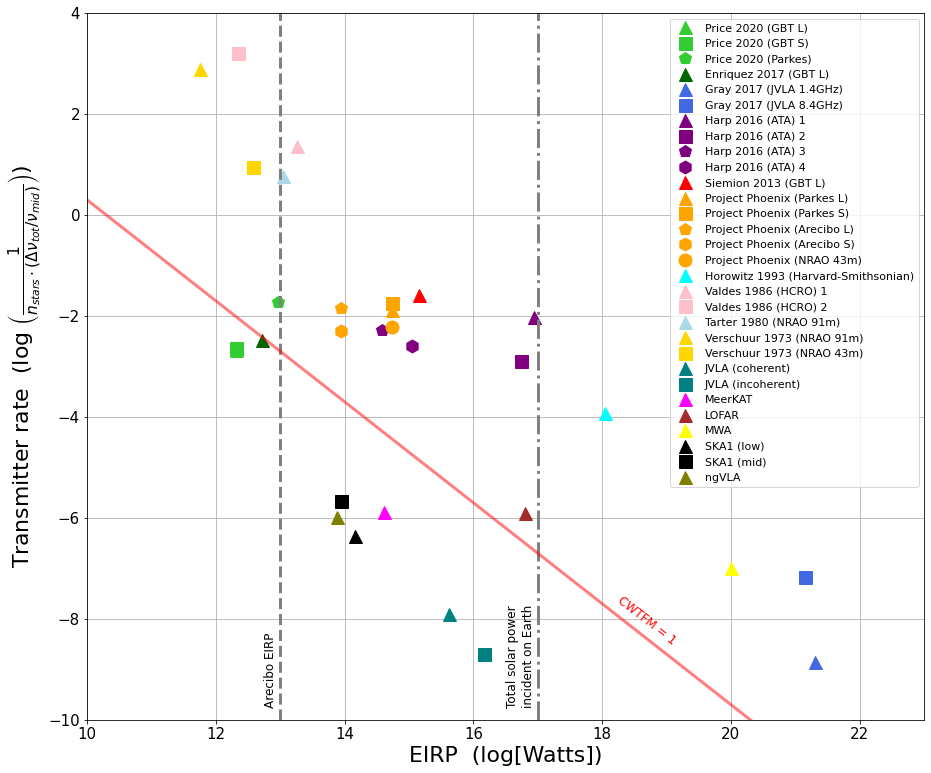

In [33]:
for key in data:

    # exclusions
    if data[key][0] != None and data[key][1] != None:
        
        plt.plot(data[key][0], data[key][1], 
                 data[key][5], color=get_clr(key), ms=13, label=key)

plt.axvline(x=13, color='gray', ls='--', lw=3)
plt.text(12.75, -9.7, 'Arecibo EIRP', color='black', rotation=90, size=12)

plt.axvline(x=17, color='gray', ls='-.', lw=3)
plt.text(16.5, -9.7, 'Total solar power', color='black', rotation=90, size=12)
plt.text(16.75, -9.7, 'incident on Earth', color='black', rotation=90, size=12)

line_x = np.linspace(10, 23, 1000)
line_y = np.log10(1 / 5e-11) - line_x

plt.plot(line_x, line_y, color='red', ls='-', lw=3, alpha=0.5)
plt.text(18.2, -8.5, 'CWTFM = 1', color='red', rotation=-38, size=12)

plt.xlim(10, 23)
plt.ylim(-10, 4)
    
plt.xlabel('EIRP  (log[Watts])', fontsize=22)
plt.ylabel(r'Transmitter rate  (log $\left(\frac{1}{n_{stars} \cdot (\Delta \nu_{tot} / \nu_{mid})}\right)$)', 
           fontsize=22)
#plt.title('Comparison of past and future SETI projects figures of merit (adapted from Enriquez (2017))', fontsize=20)

plt.gcf().set_size_inches(15, 13)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
#plt.savefig('Figure1.pdf')
plt.show()

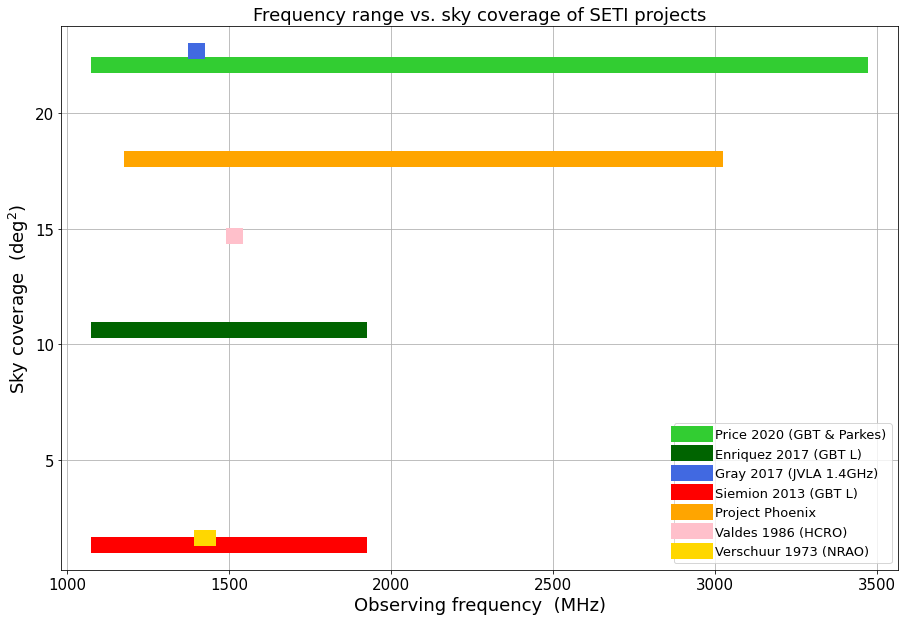

In [9]:
for key in data:
    
    # exclusions
    if data[key][2] != None and data[key][3] != None \
    and 'Harp' not in key \
    and 'Horowitz' not in key \
    and 'Tarter' not in key \
    and 'MeerKAT' not in key \
    and 'JVLA 8.4GHz' not in key :

        plt.plot(data[key][2], [data[key][3], data[key][3]], 
                 color=get_clr(key), lw=16, label=key)
        
plt.xlabel('Observing frequency  (MHz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Frequency range vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.legend(fontsize=13)
plt.grid()
plt.show()

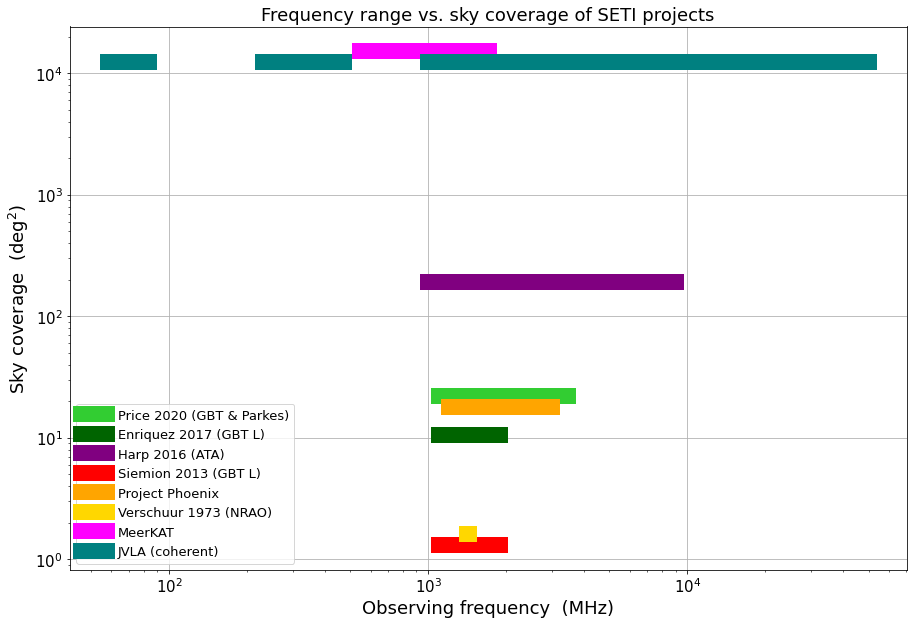

In [10]:
for key in data:
    
    # exclusions
    if data[key][2] != None and data[key][3] != None \
    and 'Gray' not in key \
    and 'Valdes' not in key \
    and 'Horowitz' not in key \
    and 'Tarter' not in key \
    and 'JVLA 8.4GHz' not in key:

        plt.plot(data[key][2], [data[key][3], data[key][3]], 
                 color=get_clr(key), lw=16, label=key)
    
plt.plot(JVLA_data[0][0], [JVLA_data[1], JVLA_data[1]], color=get_clr('JVLA'), lw=16, 
            label='JVLA (coherent)')
plt.plot(JVLA_data[0][1], [JVLA_data[1], JVLA_data[1]], color=get_clr('JVLA'), lw=16)
plt.plot(JVLA_data[0][2], [JVLA_data[1], JVLA_data[1]], color=get_clr('JVLA'), lw=16)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Observing frequency  (MHz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Frequency range vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.legend(fontsize=13)
plt.grid()
plt.show()

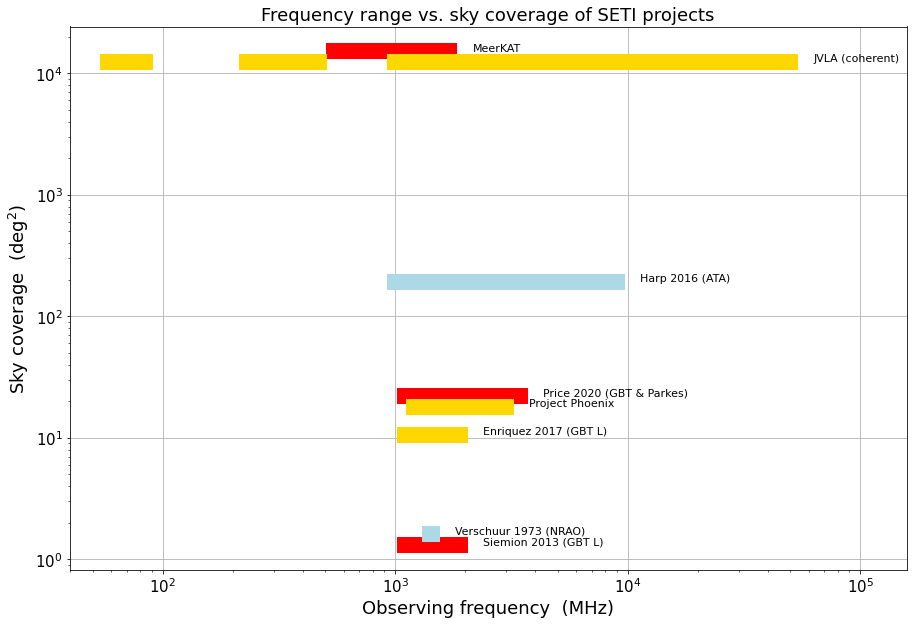

In [12]:
A, B = 10 ** 0.1, 10 ** 0.002

clr = 'red'

key = 'MeerKAT'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='High sensitivity: can detect a 1-Hz-wide signal from an Arecibo-like transmitter up to 75 pc away')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Siemion 2013 (GBT L)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Price 2020 (GBT & Parkes)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

clr = 'gold'

key = 'Project Phoenix'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='Mid sensitivity: can detect a 1-Hz-wide signal from an Arecibo-like transmitter up to 25 pc away')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Enriquez 2017 (GBT L)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

plt.plot(JVLA_data[0][0], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.plot(JVLA_data[0][1], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.plot(JVLA_data[0][2], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.text(JVLA_data[0][2][1] * A, JVLA_data[1] * B, 'JVLA (coherent)', size=11)

clr = 'lightblue'

key = 'Harp 2016 (ATA)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='Low sensitivity: can detect a 1-Hz-wide signal from an Arecibo-like transmitter up to 10 pc away')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Verschuur 1973 (NRAO)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10 ** 1.6, 10 ** 5.2)

plt.xlabel('Observing frequency  (MHz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Frequency range vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
#plt.legend(fontsize=13)
plt.grid()
#plt.savefig('Figure2.pdf')
plt.show()

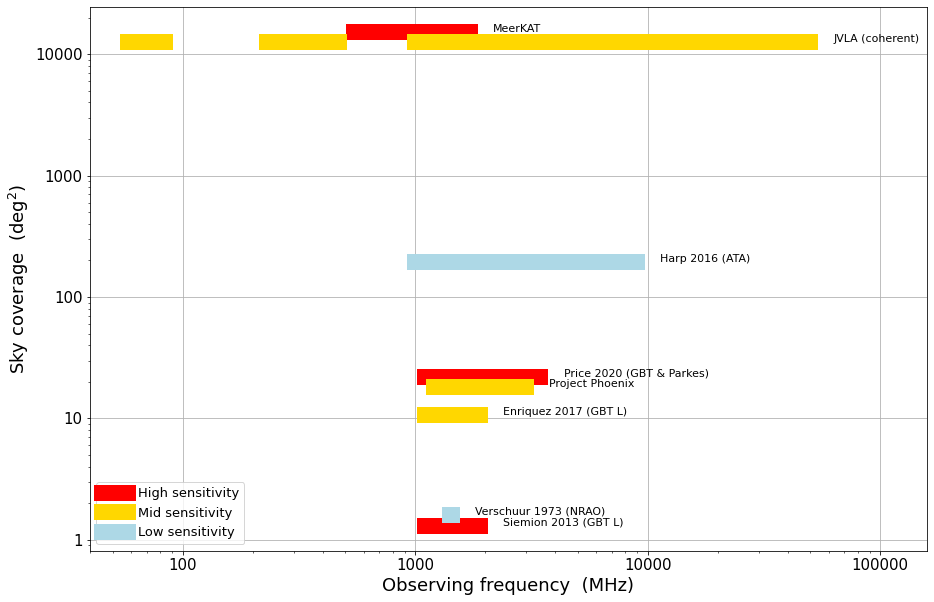

In [37]:
A, B = 10 ** 0.1, 10 ** 0.002

clr = 'red'

key = 'MeerKAT'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='High sensitivity')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Siemion 2013 (GBT L)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Price 2020 (GBT & Parkes)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

clr = 'gold'

key = 'Project Phoenix'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='Mid sensitivity')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Enriquez 2017 (GBT L)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

plt.plot(JVLA_data[0][0], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.plot(JVLA_data[0][1], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.plot(JVLA_data[0][2], [JVLA_data[1], JVLA_data[1]], color=clr, lw=16)
plt.text(JVLA_data[0][2][1] * A, JVLA_data[1] * B, 'JVLA (coherent)', size=11)

clr = 'lightblue'

key = 'Harp 2016 (ATA)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16, 
         label='Low sensitivity')
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

key = 'Verschuur 1973 (NRAO)'
plt.plot(data[key][2], [data[key][3], data[key][3]], color=clr, lw=16)
plt.text(data[key][2][1] * A, data[key][3] * B, key, size=11)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10 ** 1.6, 10 ** 5.2)

plt.xticks(ticks=[100, 1000, 10000, 100000], 
           labels=['100', '1000', '10000', '100000'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])

plt.xlabel('Observing frequency  (MHz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
#plt.title('Frequency range vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.legend(fontsize=13)
plt.grid()
#plt.savefig('Figure2.pdf')
plt.show()

In [13]:
arecibo_at_25pc = 1e13 / (4 * np.pi * (25 * u.pc.to(u.m)) ** 2) / u.Jy.to(u.W / u.m ** 2 / u.Hz)  #Jy
arecibo_at_50pc = 1e13 / (4 * np.pi * (50 * u.pc.to(u.m)) ** 2) / u.Jy.to(u.W / u.m ** 2 / u.Hz)  #Jy
arecibo_at_75pc = 1e13 / (4 * np.pi * (75 * u.pc.to(u.m)) ** 2) / u.Jy.to(u.W / u.m ** 2 / u.Hz)  #Jy
arecibo_at_100pc = 1e13 / (4 * np.pi * (100 * u.pc.to(u.m)) ** 2) / u.Jy.to(u.W / u.m ** 2 / u.Hz)  #Jy

In [14]:
def arecibo_distance(min_flux: float) -> float:
    """Return the maximum distance in pc of detection of an Arecibo-like transmitter 
    (10^13-W power and 1-Hz bandwidth) given the minimum detectable flux density of the telescope in Jy.

    """
    
    sq_dist_m = 1e13 / (4 * np.pi * min_flux * u.Jy.to(u.W / u.m ** 2 / u.Hz))
    sq_dist_pc = sq_dist_m * u.m.to(u.pc) ** 2
    
    return sq_dist_pc ** 0.5

In [15]:
def arecibo_flux(dist: float) -> float:
    """Return the flux in Jy⋅Hz received from an Arecibo-like transmitter (10^13-W power) transmitting 
    a 1-Hz-wide signalfrom distance dist in pc.

    """
    
    dist_m = dist * u.pc.to(u.m)
    flux_W_per_m2 = 1e13 / (4 * np.pi * (dist_m ** 2))
        
    return flux_W_per_m2 / u.Jy.to(u.W / u.m ** 2 / u.Hz)

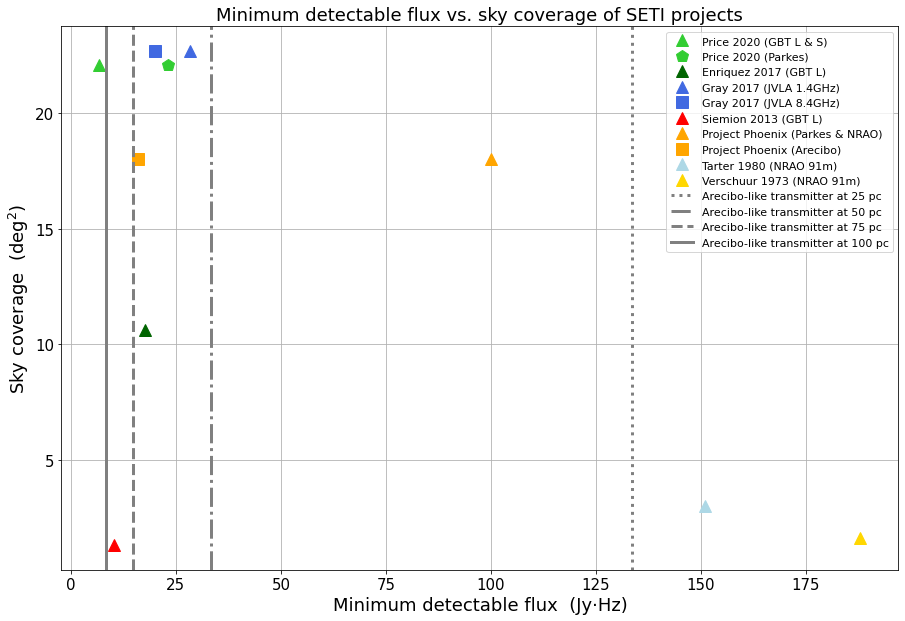

In [16]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None \
    and 'Valdes' not in key \
    and 'Horowitz' not in key \
    and 'NRAO 43m' not in key \
    and 'MeerKAT' not in key \
    and 'Harp' not in key \
    and 'JVLA (coherent)' not in key:
    
        plt.plot(data[key][4], data[key][3], 
                 data[key][5], color=get_clr(key), ms=12, label=key)

plt.axvline(x=arecibo_at_25pc, color='gray', ls=':', lw=3, label='Arecibo-like transmitter at 25 pc')
plt.axvline(x=arecibo_at_50pc, color='gray', ls='-.', lw=3, label='Arecibo-like transmitter at 50 pc')
plt.axvline(x=arecibo_at_75pc, color='gray', ls='--', lw=3, label='Arecibo-like transmitter at 75 pc')
plt.axvline(x=arecibo_at_100pc, color='gray', ls='-', lw=3, label='Arecibo-like transmitter at 100 pc')    
    
plt.xlabel('Minimum detectable flux  (Jy⋅Hz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Minimum detectable flux vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
plt.show()

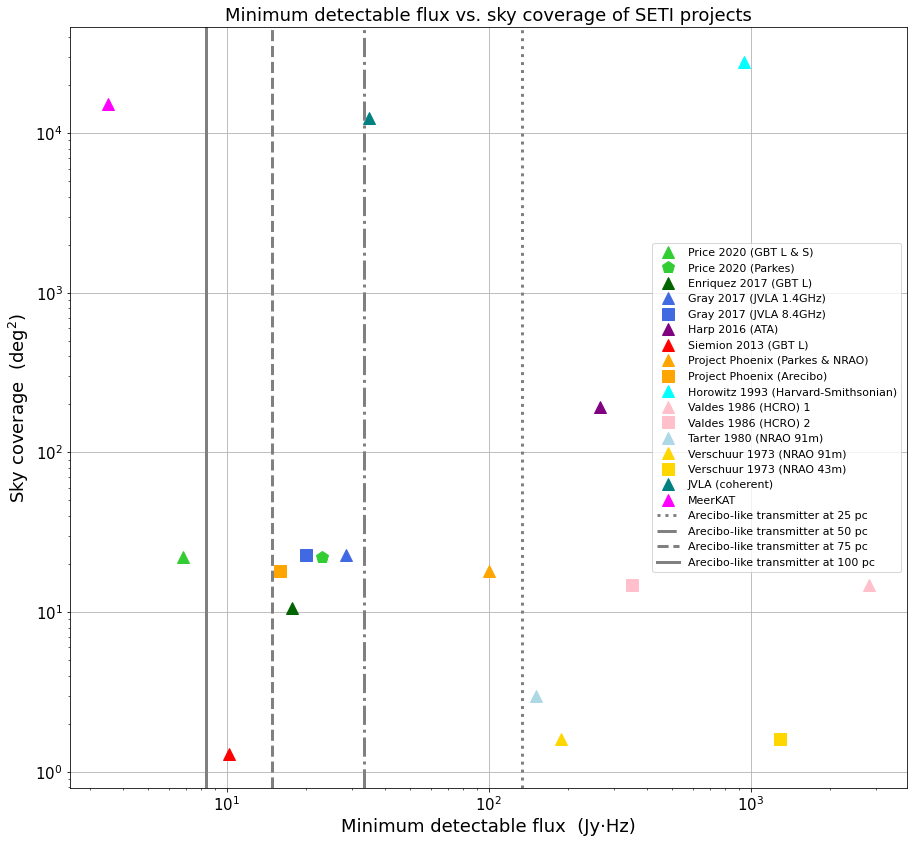

In [17]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
    
        plt.plot(data[key][4], data[key][3], 
                 data[key][5], color=get_clr(key), ms=12, label=key)

plt.axvline(x=arecibo_at_25pc, color='gray', ls=':', lw=3, label='Arecibo-like transmitter at 25 pc')
plt.axvline(x=arecibo_at_50pc, color='gray', ls='-.', lw=3, label='Arecibo-like transmitter at 50 pc')
plt.axvline(x=arecibo_at_75pc, color='gray', ls='--', lw=3, label='Arecibo-like transmitter at 75 pc')
plt.axvline(x=arecibo_at_100pc, color='gray', ls='-', lw=3, label='Arecibo-like transmitter at 100 pc')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Minimum detectable flux  (Jy⋅Hz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Minimum detectable flux vs. sky coverage of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 14)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
#plt.savefig('Figure3.pdf')
plt.show()

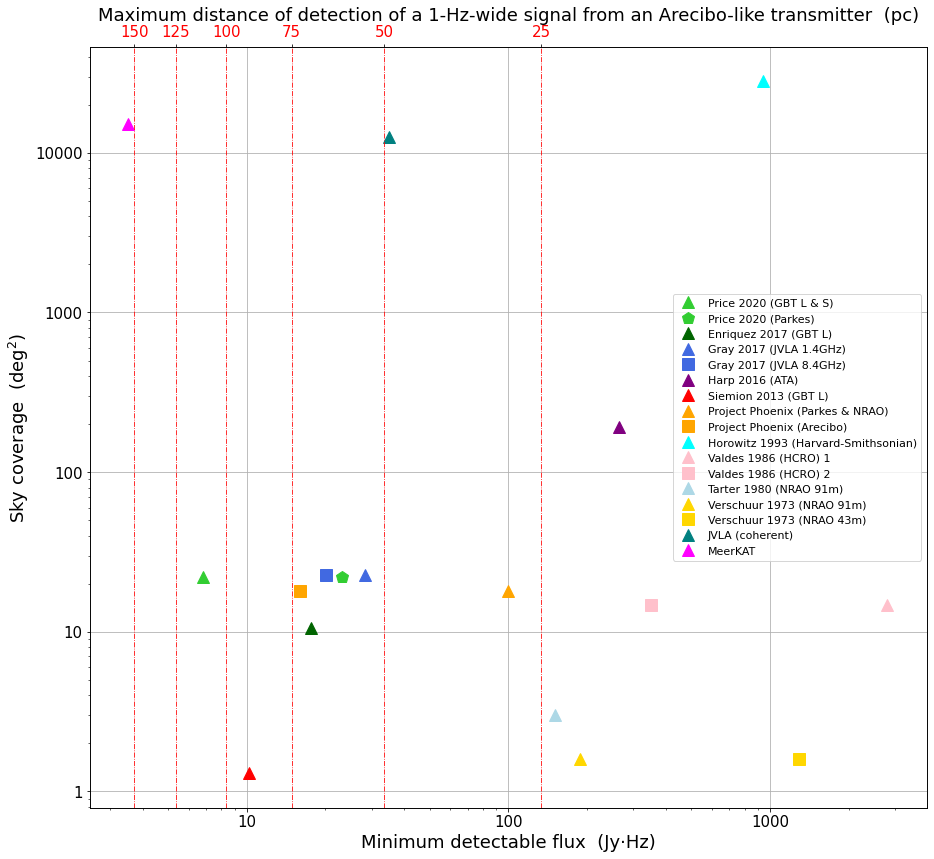

In [71]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
    
        plt.plot(data[key][4], data[key][3], 
                 data[key][5], color=get_clr(key), ms=12, label=key)

plt.xlim(10 ** 0.4, 10 ** 3.6)
plt.xscale('log')
plt.yscale('log')

plt.xticks(ticks=[10, 100, 1000], 
           labels=['10', '100', '1000'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])

plt.xlabel('Minimum detectable flux  (Jy⋅Hz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)

plt.gcf().set_size_inches(15, 14)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()

plt.twiny()
plt.xlim(0.4, 3.6)

distances = np.array([150, 125, 100, 75, 50, 25])

plt.xticks(ticks=np.log10(arecibo_flux(distances)), 
           labels=['150', '125', '100', '75', '50', '25'], color='red')

plt.xlabel('Maximum distance of detection of a 1-Hz-wide signal from an Arecibo-like transmitter  (pc)', 
           fontsize=18)
plt.grid(color='red', ls='-.')

plt.savefig('Figure3.pdf')
plt.show()

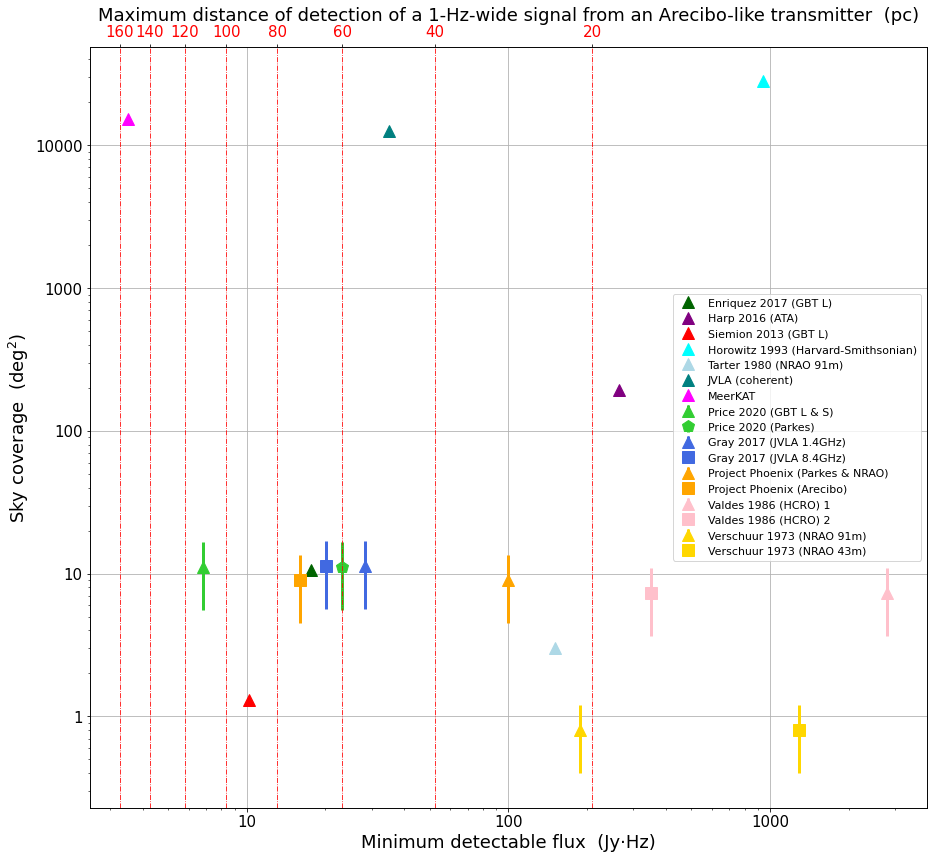

In [63]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
        if 'Price' not in key \
        and 'Gray' not in key \
        and 'Phoenix' not in key \
        and 'Valdes' not in key \
        and 'Verschuur' not in key:
    
            plt.plot(data[key][4], data[key][3], 
                     data[key][5], color=get_clr(key), ms=12, label=key)
        
        else:
            
            plt.errorbar(data[key][4], data[key][3] / 2, yerr=(data[key][3] / 4), 
                         fmt=data[key][5], color=get_clr(key), ms=12, lw=3, label=key)

plt.xlim(10 ** 0.4, 10 ** 3.6)
plt.xscale('log')
plt.yscale('log')

plt.xticks(ticks=[10, 100, 1000], 
           labels=['10', '100', '1000'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])

plt.xlabel('Minimum detectable flux  (Jy⋅Hz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)

plt.gcf().set_size_inches(15, 14)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()

plt.twiny()
plt.xlim(0.4, 3.6)

distances = np.array([160, 140, 120, 100, 80, 60, 40, 20])

plt.xticks(ticks=np.log10(arecibo_flux(distances)), 
           labels=['160', '140', '120', '100', '80', '60', '40', '20'], color='red')

plt.xlabel('Maximum distance of detection of a 1-Hz-wide signal from an Arecibo-like transmitter  (pc)', 
           fontsize=18)
plt.grid(color='red', ls='-.')

#plt.savefig('Figure3.pdf')
plt.show()

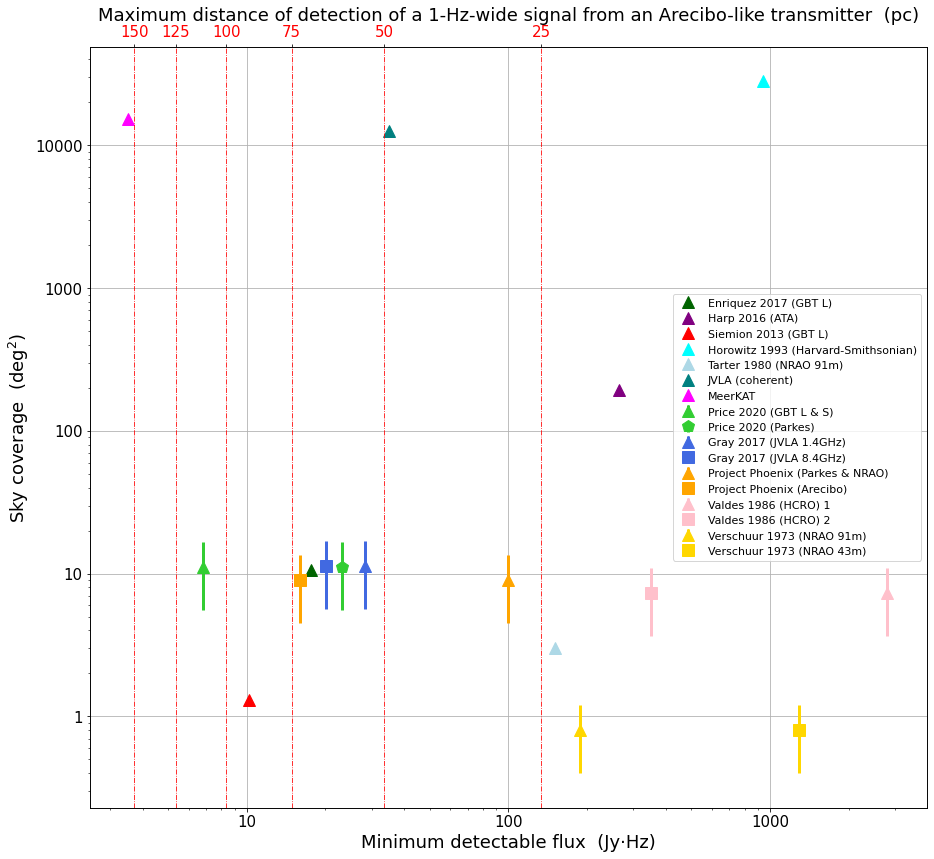

In [66]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
        if 'Price' not in key \
        and 'Gray' not in key \
        and 'Phoenix' not in key \
        and 'Valdes' not in key \
        and 'Verschuur' not in key:
    
            plt.plot(data[key][4], data[key][3], 
                     data[key][5], color=get_clr(key), ms=12, label=key)
        
        else:
            
            plt.errorbar(data[key][4], data[key][3] / 2, yerr=(data[key][3] / 4), 
                         fmt=data[key][5], color=get_clr(key), ms=12, lw=3, label=key)

plt.xlim(10 ** 0.4, 10 ** 3.6)
plt.xscale('log')
plt.yscale('log')

plt.xticks(ticks=[10, 100, 1000], 
           labels=['10', '100', '1000'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])

plt.xlabel('Minimum detectable flux  (Jy⋅Hz)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)

plt.gcf().set_size_inches(15, 14)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()

plt.twiny()
plt.xlim(0.4, 3.6)

distances = np.array([150, 125, 100, 75, 50, 25])

plt.xticks(ticks=np.log10(arecibo_flux(distances)), 
           labels=['150', '125', '100', '75', '50', '25'], color='red')

plt.xlabel('Maximum distance of detection of a 1-Hz-wide signal from an Arecibo-like transmitter  (pc)', 
           fontsize=18)
plt.grid(color='red', ls='-.')

plt.savefig('Figure3.pdf')
plt.show()

In [20]:
arecibo_at_25pc, arecibo_at_75pc

(133.72389817490173, 14.858210908322418)

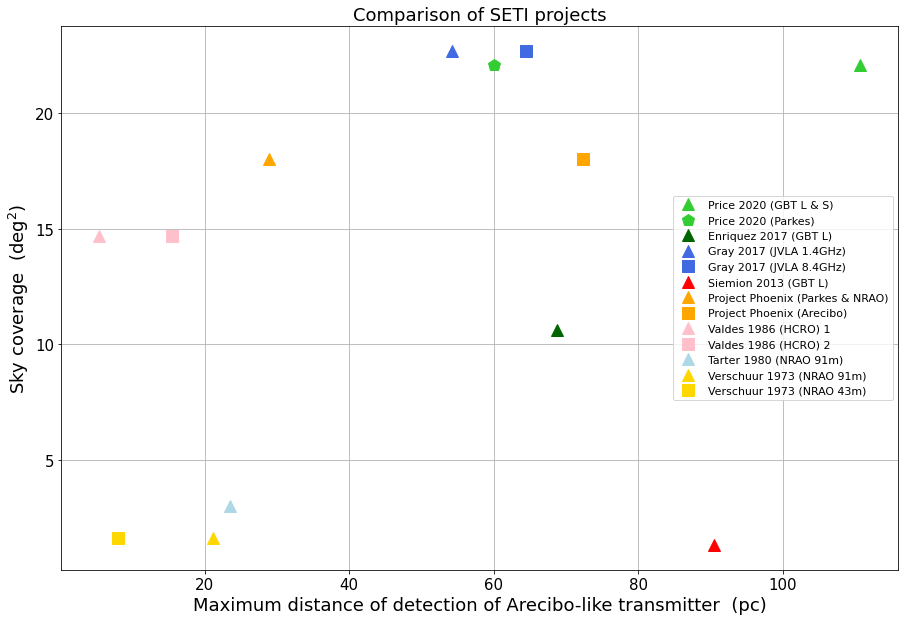

In [21]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None \
    and 'Horowitz' not in key \
    and 'MeerKAT' not in key \
    and 'Harp' not in key \
    and 'JVLA (coherent)' not in key:
    
        plt.plot(arecibo_distance(data[key][4]), data[key][3], 
                 data[key][5], color=get_clr(key), ms=12, label=key)

plt.xlabel('Maximum distance of detection of Arecibo-like transmitter  (pc)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Comparison of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid()
plt.show()

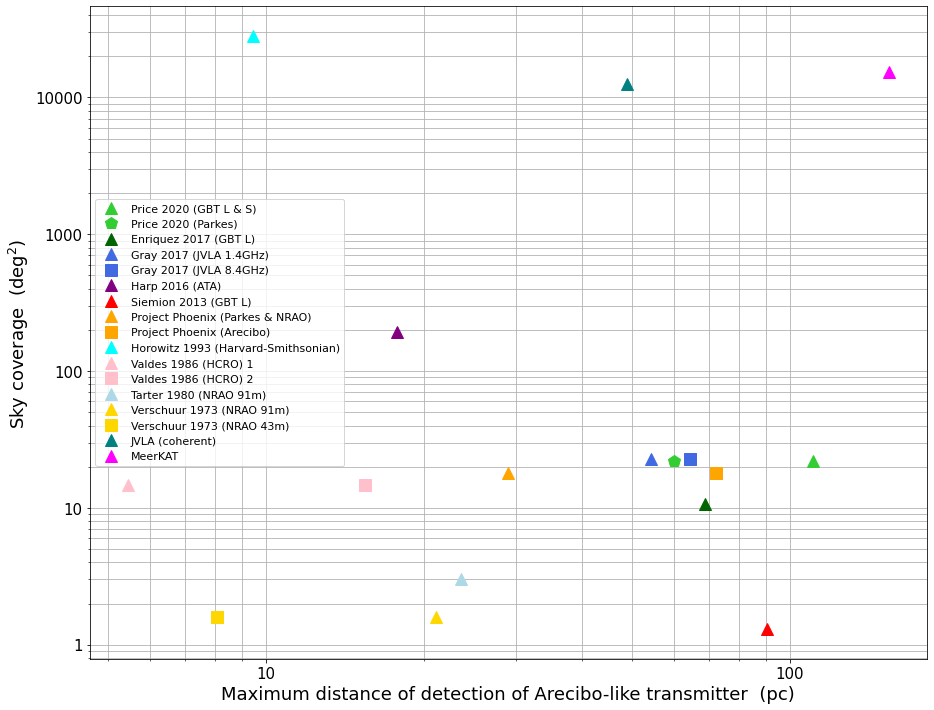

In [73]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
    
        plt.plot(arecibo_distance(data[key][4]), data[key][3], 
                 data[key][5], color=get_clr(key), ms=12, label=key)

plt.xscale('log')
plt.yscale('log')    

plt.xticks(ticks=[10, 100], 
           labels=['10', '100'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])
        
plt.xlabel('Maximum distance of detection of Arecibo-like transmitter  (pc)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
#plt.title('Comparison of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 12)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid(which='both')
#plt.savefig('Figure4.pdf')
plt.show()

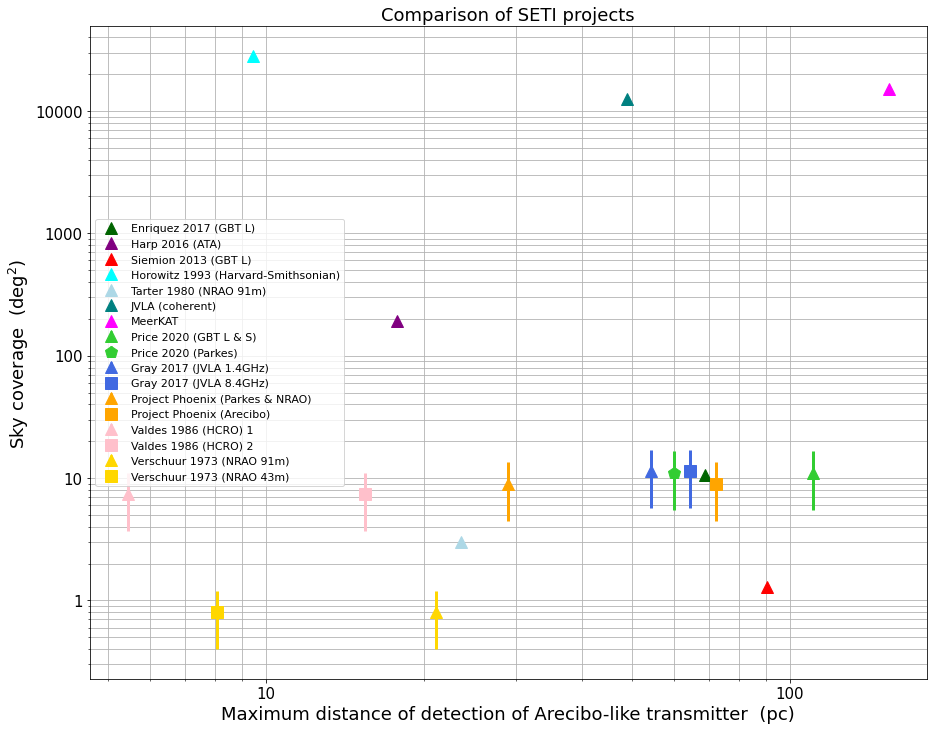

In [23]:
for key in data:
    
    # exclusions
    if data[key][3] != None and data[key][4] != None:
        if 'Price' not in key \
        and 'Gray' not in key \
        and 'Phoenix' not in key \
        and 'Valdes' not in key \
        and 'Verschuur' not in key:
    
            plt.plot(arecibo_distance(data[key][4]), data[key][3], 
                     data[key][5], color=get_clr(key), ms=12, label=key)
        
        else:
            
            plt.errorbar(arecibo_distance(data[key][4]), data[key][3] / 2, yerr=(data[key][3] / 4), 
                         fmt=data[key][5], color=get_clr(key), ms=12, lw=3, label=key)

plt.xscale('log')
plt.yscale('log')    

plt.xticks(ticks=[10, 100], 
           labels=['10', '100'])
plt.yticks(ticks=[1, 10, 100, 1000, 10000], 
           labels=['1', '10', '100', '1000', '10000'])
        
plt.xlabel('Maximum distance of detection of Arecibo-like transmitter  (pc)', fontsize=18)
plt.ylabel(r'Sky coverage  (deg$^2$)', fontsize=18)
plt.title('Comparison of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 12)
plt.rc('font', size=15)
plt.legend(fontsize=11)
plt.grid(which='both')
#plt.savefig('Figure4.pdf')
plt.show()

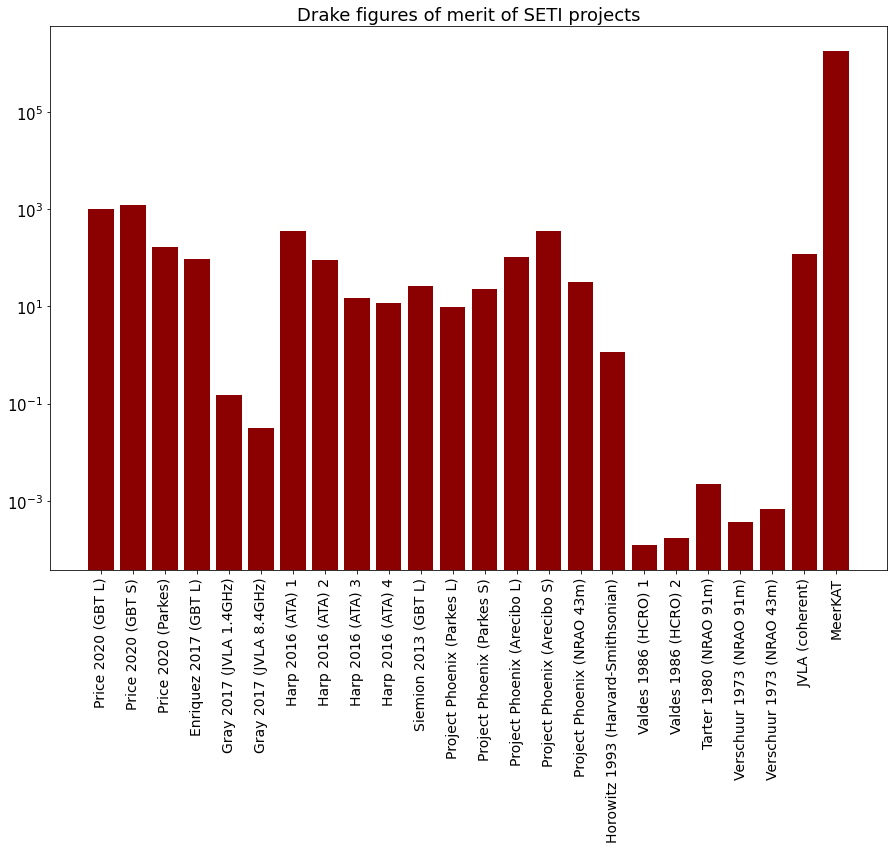

In [24]:
names = []
DFM = []

for key in data:
    
    if data[key][6] != None:
        names.append(key)
        DFM.append(data[key][6])

plt.bar(names, DFM, color='darkred')
plt.yscale('log')
plt.xticks(rotation=90, size=14)

plt.title('Drake figures of merit of SETI projects', fontsize=18)

plt.gcf().set_size_inches(15, 10)
plt.rc('font', size=15)
plt.show()

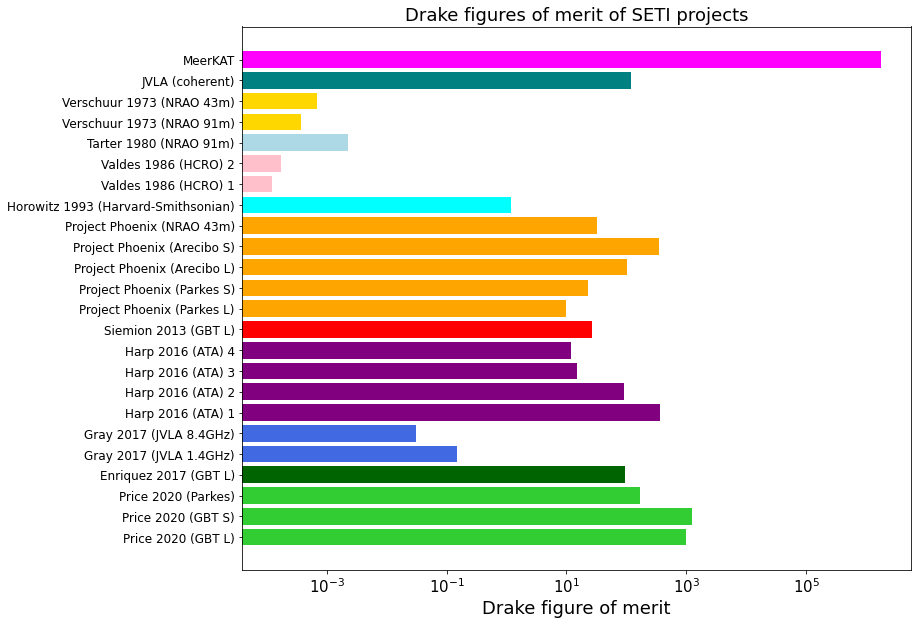

In [25]:
names = []
DFM = []
bar_clr = []

for key in data:
    
    if data[key][6] != None:
        names.append(key)
        DFM.append(data[key][6])
        bar_clr.append(get_clr(key))

plt.barh(names, DFM, color=bar_clr)
plt.xscale('log')
plt.yticks(size=12)

plt.title('Drake figures of merit of SETI projects', fontsize=18)
plt.xlabel('Drake figure of merit', fontsize=18)

plt.gcf().set_size_inches(12, 10)
plt.rc('font', size=15)
#plt.savefig('Figure5.png')
plt.show()

In [26]:
len(names)

24

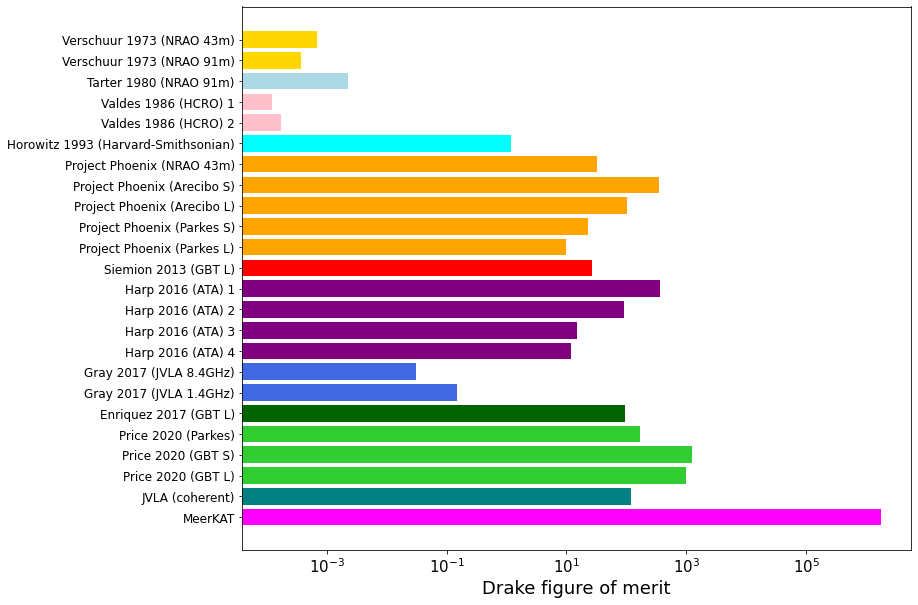

In [48]:
names = []
DFM = []
bar_clr = []

for key in data:
    
    if data[key][6] != None:
        names.append(key)
        DFM.append(data[key][6])
        bar_clr.append(get_clr(key))

# Manually rearranging the lists following inspection

names = names[23:] + names[22:23] + names[:6] + names[9:10] + names[8:9] + names[7:8] + names[6:7] \
+ names[10:17] + names[18:19] + names[17:18] + names[19:22]

DFM = DFM[23:] + DFM[22:23] + DFM[:6] + DFM[9:10] + DFM[8:9] + DFM[7:8] + DFM[6:7] \
+ DFM[10:17] + DFM[18:19] + DFM[17:18] + DFM[19:22]

bar_clr = bar_clr[23:] + bar_clr[22:23] + bar_clr[:6] + bar_clr[9:10] + bar_clr[8:9] + bar_clr[7:8] + bar_clr[6:7] \
+ bar_clr[10:17] + bar_clr[18:19] + bar_clr[17:18] + bar_clr[19:22]

plt.barh(names, DFM, color=bar_clr)
plt.xscale('log')
plt.yticks(size=12)

#plt.title('Drake figures of merit of SETI projects', fontsize=18)
plt.xlabel('Drake figure of merit', fontsize=18)

plt.gcf().set_size_inches(12, 10)
plt.rc('font', size=15)
#plt.savefig('Figure5.png')
plt.show()

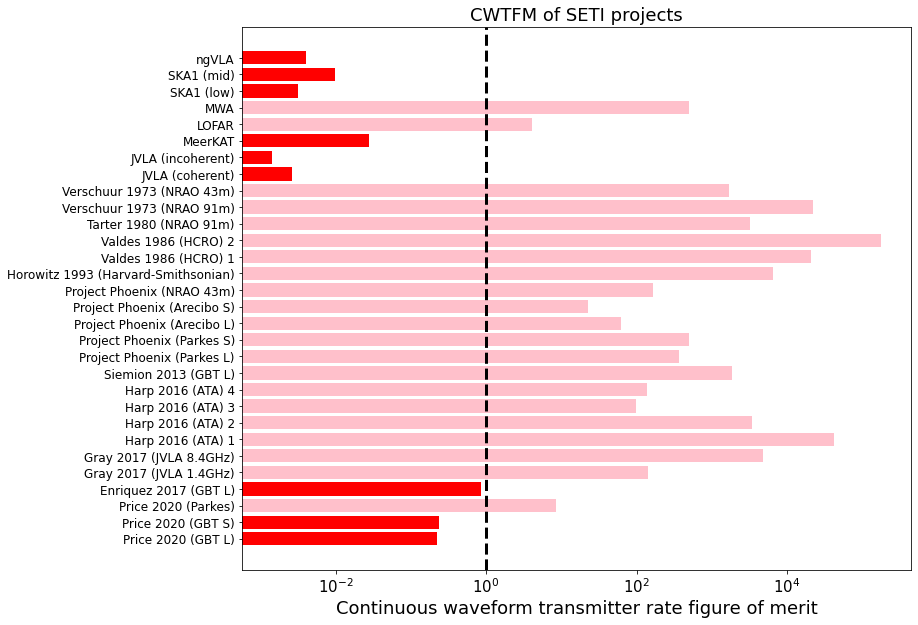

In [28]:
names = []
CWTFM = []
bar_clr = []
zeta = 5e-11

for key in data:
    
    if data[key][0] != None and data[key][1] != None:
        
        names.append(key)
        
        value = zeta * (10 ** data[key][0]) * (10 ** data[key][1])
        CWTFM.append(value)
        
        if value < 1:
            bar_clr.append('red')
        else:
            bar_clr.append('pink')

plt.barh(names, CWTFM, color=bar_clr)
plt.axvline(x=1, color='black', ls='--', lw=3)

plt.xscale('log')
plt.yticks(size=12)

plt.title('CWTFM of SETI projects', fontsize=18)
plt.xlabel('Continuous waveform transmitter rate figure of merit', fontsize=18)

plt.gcf().set_size_inches(12, 10)
plt.rc('font', size=15)
#plt.savefig('Figure6.png')
plt.show()

In [29]:
len(names)

30

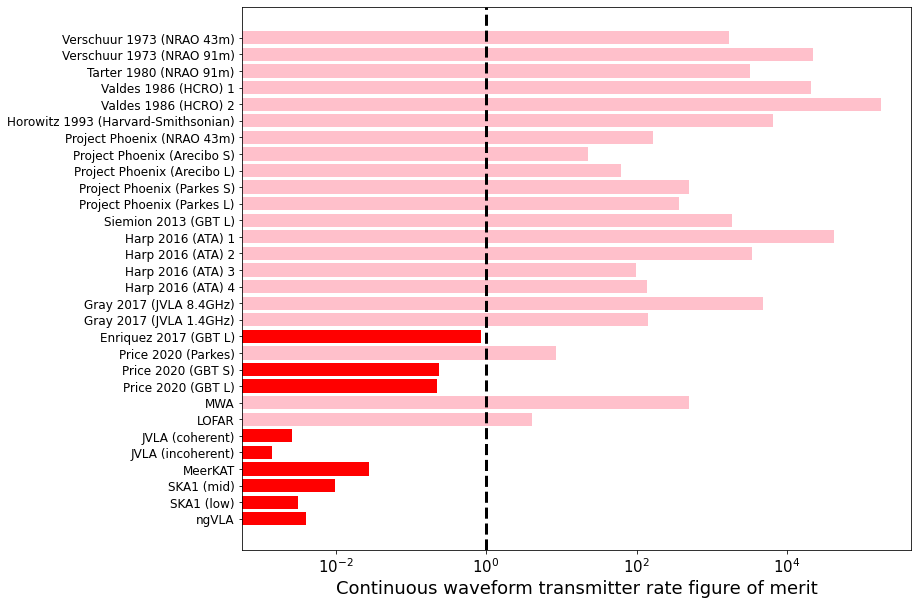

In [50]:
names = []
CWTFM = []
bar_clr = []
zeta = 5e-11

for key in data:
    
    if data[key][0] != None and data[key][1] != None:
        
        names.append(key)
        
        value = zeta * (10 ** data[key][0]) * (10 ** data[key][1])
        CWTFM.append(value)
        
        if value < 1:
            bar_clr.append('red')
        else:
            bar_clr.append('pink')

# Manually rearranging the lists following inspection

names = names[29:] + names[27:29] + names[24:25] + names[23:24] + names[22:23] + names[25:27] + names[:6] \
+ names[9:10] + names[8:9] + names[7:8] + names[6:7] + names[10:17] + names[18:19] + names[17:18] + names[19:22]

CWTFM = CWTFM[29:] + CWTFM[27:29] + CWTFM[24:25] + CWTFM[23:24] + CWTFM[22:23] + CWTFM[25:27] + CWTFM[:6] \
+ CWTFM[9:10] + CWTFM[8:9] + CWTFM[7:8] + CWTFM[6:7] + CWTFM[10:17] + CWTFM[18:19] + CWTFM[17:18] + CWTFM[19:22]

bar_clr = bar_clr[29:] + bar_clr[27:29] + bar_clr[24:25] + bar_clr[23:24] + bar_clr[22:23] + bar_clr[25:27] \
+ bar_clr[:6] + bar_clr[9:10] + bar_clr[8:9] + bar_clr[7:8] + bar_clr[6:7] + bar_clr[10:17] + bar_clr[18:19] \
+ bar_clr[17:18] + bar_clr[19:22]

plt.barh(names, CWTFM, color=bar_clr)
plt.axvline(x=1, color='black', ls='--', lw=3)

plt.xscale('log')
plt.yticks(size=12)

#plt.title('CWTFM of SETI projects', fontsize=18)
plt.xlabel('Continuous waveform transmitter rate figure of merit', fontsize=18)

plt.gcf().set_size_inches(12, 10)
plt.rc('font', size=15)
#plt.savefig('Figure6.png')
plt.show()